# 寻找合适的threshold

## 真实验证码

In [211]:
im = Image.open('realcap/captcha (10).gif').convert('L')
X_im = np.asarray(im).copy()
uniques, counts = np.unique(X_im, return_counts=True)
uniques

array([ 85,  99, 107, 117, 124, 126, 135, 140, 144, 151, 158, 162, 168,
       173, 180, 186, 197, 203, 208, 215, 221, 225, 232, 249], dtype=uint8)

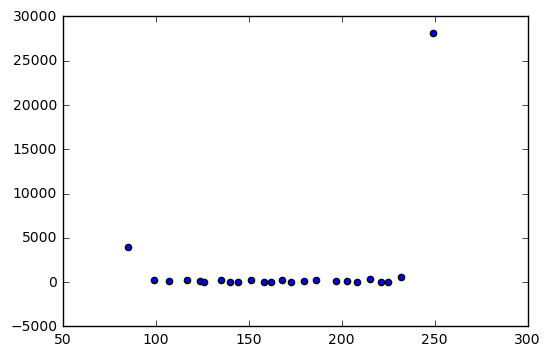

In [212]:
from pylab import *
scatter(uniques, counts)
show()

In [213]:
X_im[X_im <= 150] = 0
X_im[X_im > 150] = 255

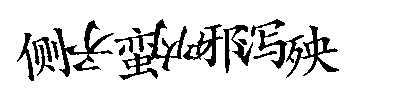

In [214]:
Image.fromarray(X_im)

## 模拟生成验证码

In [274]:
r = util.RandomGenerateOneChar(y=1).convert('L')

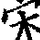

In [275]:
r

In [276]:
X = np.asarray(r).astype('float64')

In [277]:
uniques, counts = np.unique(X, return_counts=True)

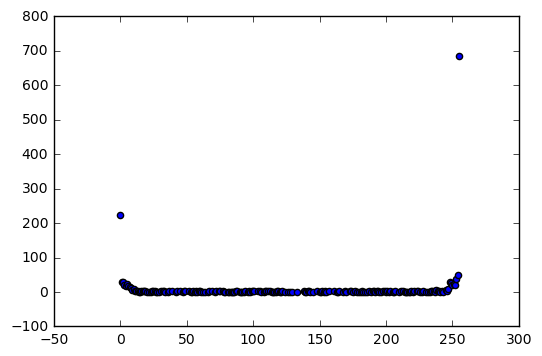

In [278]:
from pylab import *
scatter(uniques, counts)
show()

In [279]:
X[X <= 150] = 0
X[X > 150] = 255

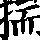

In [242]:
Image.fromarray(X)

# 生成训练数据

In [1]:
from PIL import Image, ImageFont, ImageDraw
from zheye import util
from random import randint
import numpy as np

%matplotlib inline

In [10]:
sample_size = 1000

In [11]:
X = []
Y = []

for i in range(sample_size):
    #direction = np.random.binomial(1, 0.5)
    #if direction == 0:
    #    direction = -1
    direction = -1
    
    ret = util.RandomGenerateOneChar(y=direction)

    tmp = np.asarray(ret.convert('L')).astype('float64')
    
    tmp[tmp <= 150] = -1
    # 黑色 
    tmp[tmp >  150] = 1
    # 白底
    
    X.append(tmp)
    
    if direction == 1:
        Y.append([1,0])
    else:
        Y.append([0,1])

X = np.array(X).astype("float64")
Y = np.array(Y).astype("uint8")

In [12]:
print Y[0]

[0 1]


In [13]:
Y.shape

(1000, 2)

# 标准化是依照特征矩阵的列处理数据(to do)

In [14]:
X[0]

array([[ 1.,  1.,  1., ..., -1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [15]:
"""
mean = (X.sum(axis=0) /sample_size)
Image.fromarray(mean)
np.sum(mean)/mean.size
X = (X.astype("float64") - mean)/256
"""
""""""

''

In [16]:
X = np.expand_dims(X, axis=3)
X.shape

(1000, 40, 40, 1)

# 存储

In [302]:
np.save('test_X', X)
np.save('test_Y', Y)

In [8]:
np.save('train_X', X)
np.save('train_Y', Y)

# 生成召回率/查准率样本

$$
\begin{array}{c|lll}
n & \text{正样本} & \text{负样本} \\
\hline
\text{识别为正样本} & \text{True Positive} & \text{False Positive(一类错误)} \\
\text{识别为负样本} & \text{False Negative(二类错误)} & \text{True Negative}
\end{array}|
$$

查准率$ Precision = TP/(TP+FP) $

召回率$ Recall = TP/(TP+FN) $

In [9]:
np.save('testF_X', X)
np.save('testF_Y', Y)

In [18]:
np.save('testT_X', X)
np.save('testT_Y', Y)